In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
data = datasets.load_wine(as_frame = True)

In [5]:
data

{'data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0      14.23        1.71  2.43               15.6      127.0           2.80   
 1      13.20        1.78  2.14               11.2      100.0           2.65   
 2      13.16        2.36  2.67               18.6      101.0           2.80   
 3      14.37        1.95  2.50               16.8      113.0           3.85   
 4      13.24        2.59  2.87               21.0      118.0           2.80   
 ..       ...         ...   ...                ...        ...            ...   
 173    13.71        5.65  2.45               20.5       95.0           1.68   
 174    13.40        3.91  2.48               23.0      102.0           1.80   
 175    13.27        4.28  2.26               20.0      120.0           1.59   
 176    13.17        2.59  2.37               20.0      120.0           1.65   
 177    14.13        4.10  2.74               24.5       96.0           2.05   
 
      flavanoids  nonflavanoid

In [6]:
X = data.data
y = data.target
names = data.target_names
print(names)

['class_0' 'class_1' 'class_2']


In [8]:
df = pd.DataFrame(X, columns = data.feature_names)
df['wine class'] = data.target
df['wine class'] = df['wine calss'].replace(to_replace=[0,1,2],value = ['class_0','class_1','class_2'])

KeyError: 'wine calss'

In [9]:
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  wine class  
0                            3.92   1065.0           0  
1                            3.40   1050.0           0  
2                            3.17   1185.0           0  
3                            3.45   1480.0           0  
4                            2.93    735.0           0  
..                            ...      ...         ...  
173                          1.74    740.0           2  
174                          1.56    750.0           2  
175                          1.56    835.0           2  
176                          1.62    840.0           2  
177                          1.60    560.0           2  

[178 rows x 14 columns]

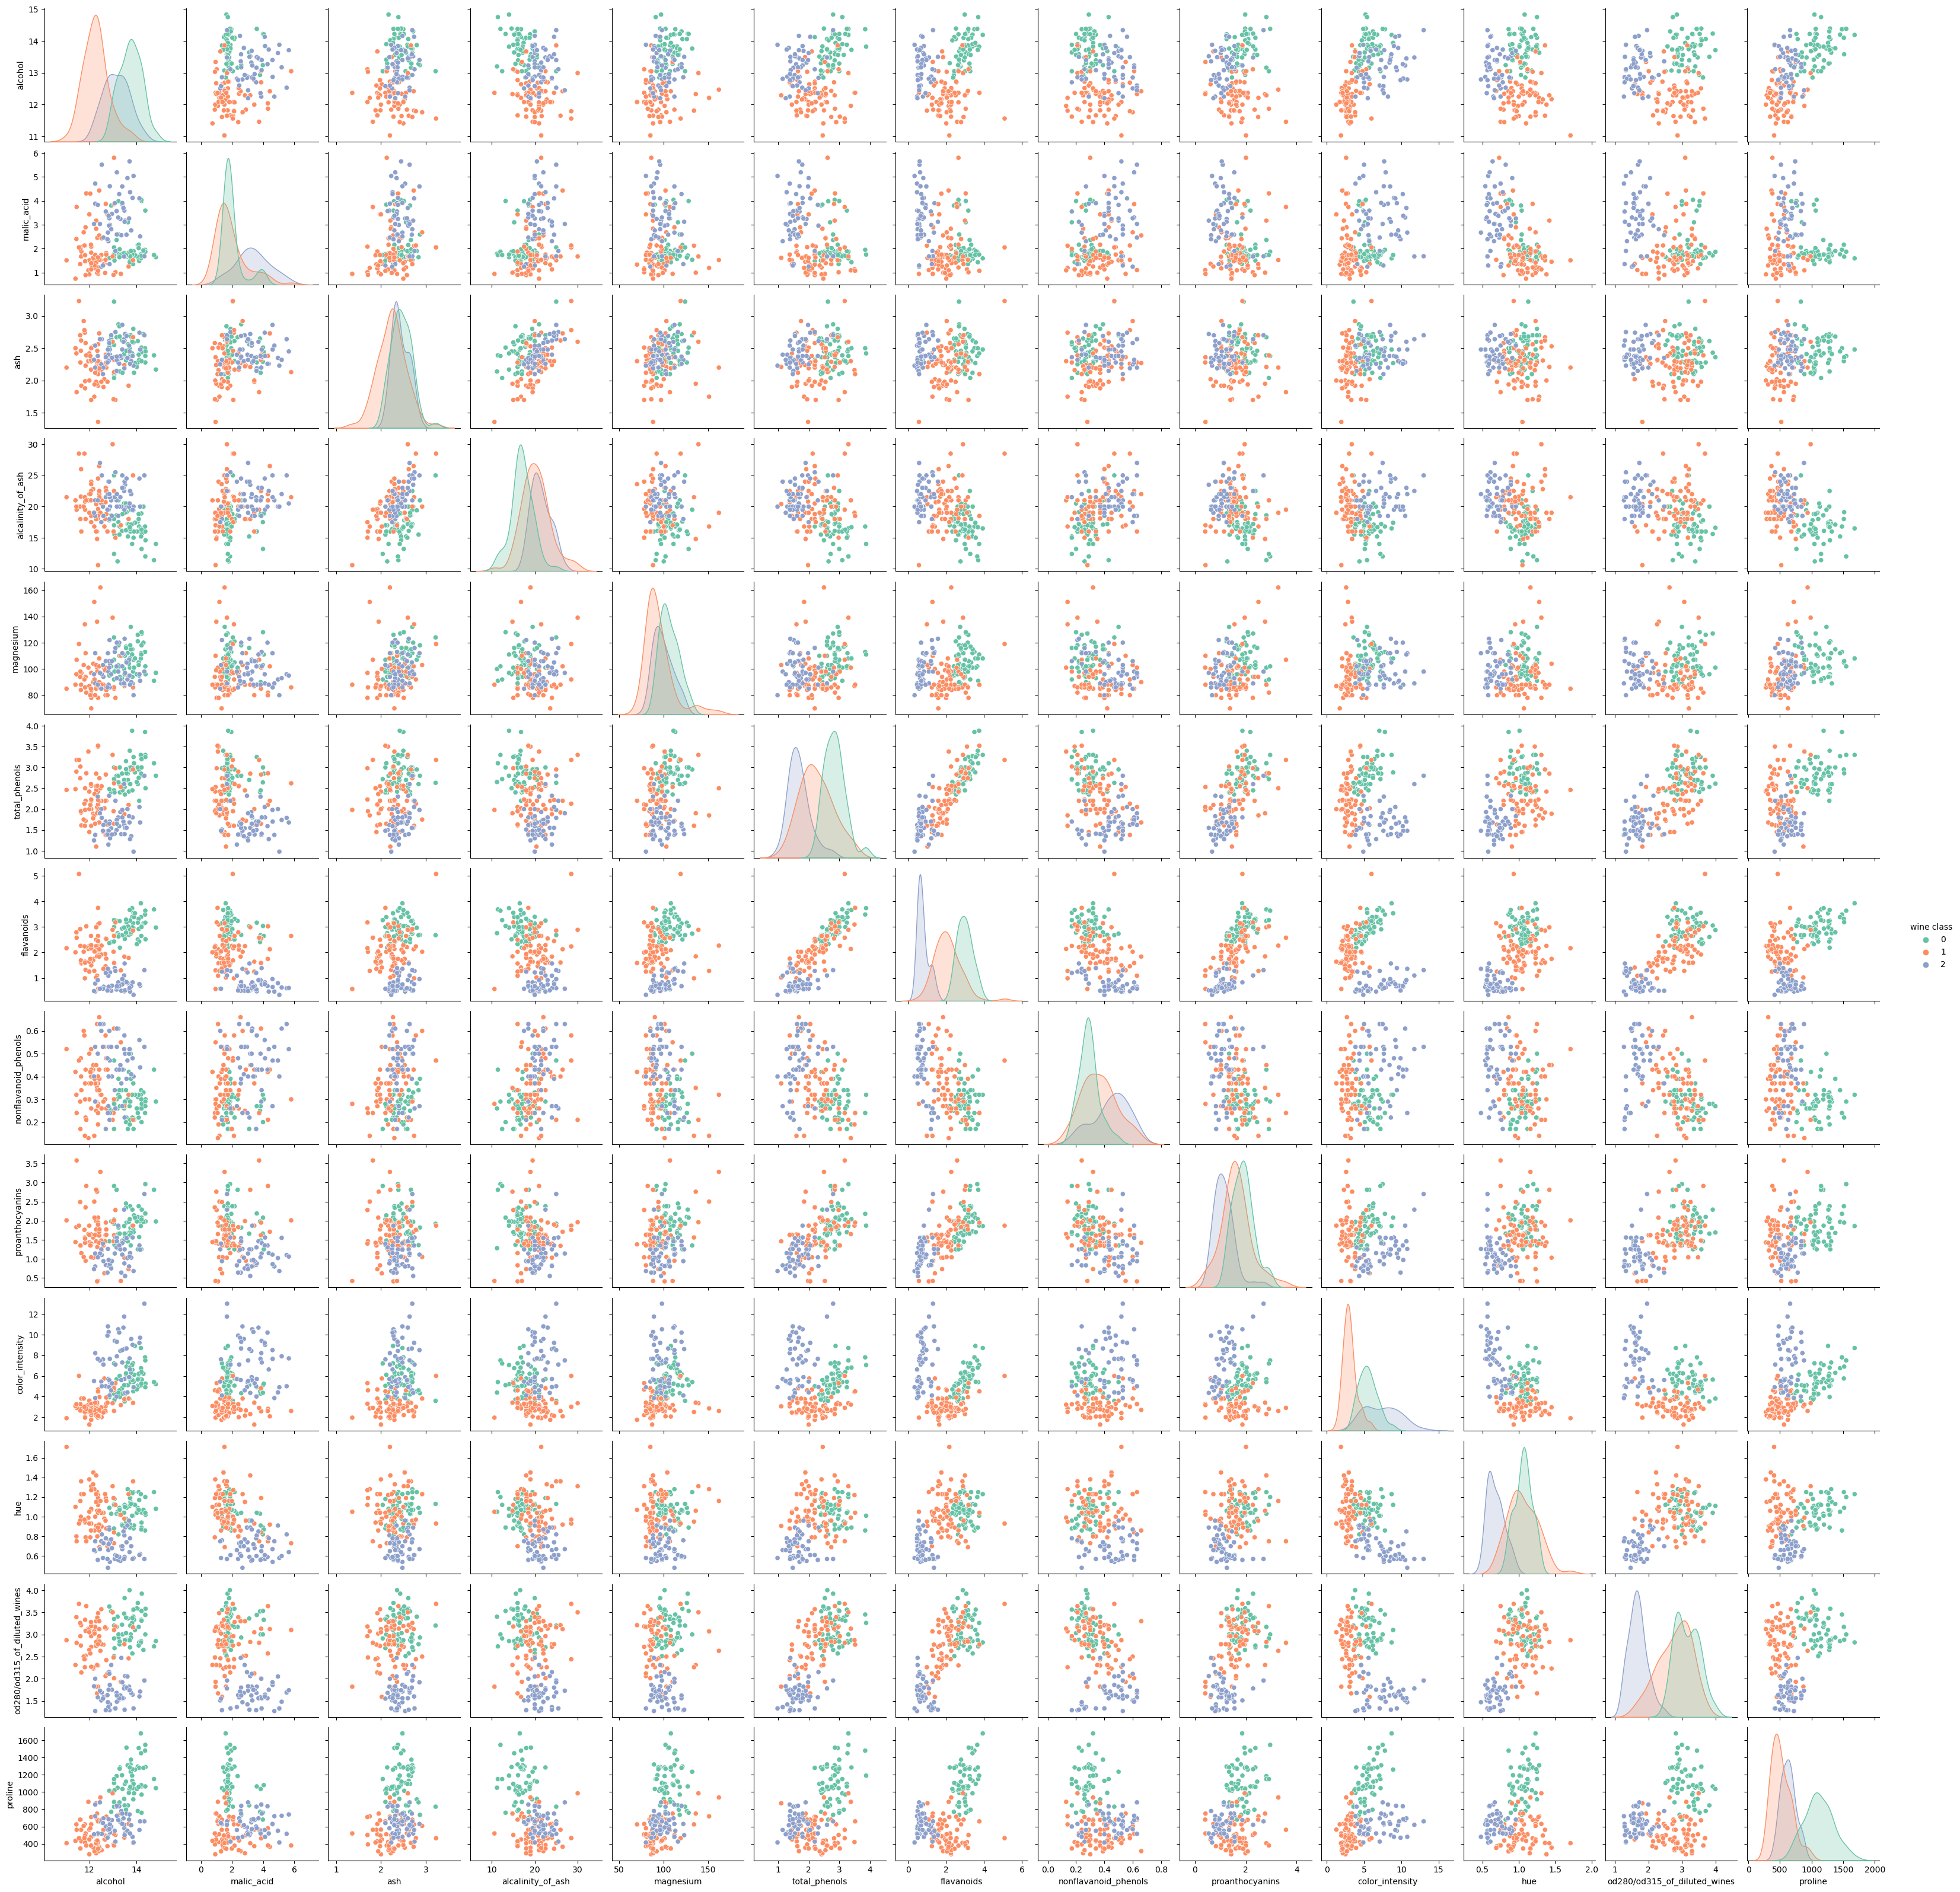

In [11]:
sns.pairplot(data = df,hue = 'wine class',palette = 'Set2')
plt.show()

In [12]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
wine class                      0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

import math
math.sqrt(len(y_test))

7.3484692283495345

In [20]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [21]:
from sklearn import metrics
metrics.accuracy_score(y_test,pred)

0.6481481481481481

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [26]:
knn1 = KNeighborsClassifier(n_neighbors = 7,metric = 'euclidean')
knn1.fit(X_train,y_train)
pred2 = knn1.predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [27]:
metrics.accuracy_score(y_test, pred2)

0.9814814814814815